**Трофимов Михаил, ПМ22-1**

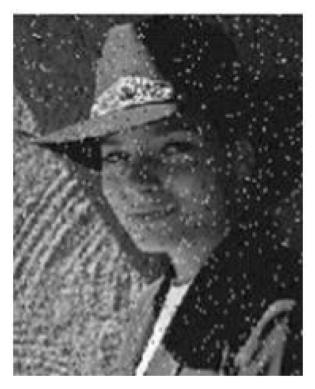

(234, 187, 3)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('081312_1337_30.jpg')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

img.shape

#1.
Напишите программу Python для применения фильтра среднего к изображению с шумом типа «соль-перец». Опишите вывод, включая способность фильтра среднего удалять шум. Без OpenCV.

In [2]:
def avg_filter(image, window = 3):
    pad = window // 2
    h, w, c = image.shape
    image_filtered = np.zeros((h, w, c), dtype = np.uint8)
    image_pad = np.pad(image, ((pad, pad), (pad, pad), (0, 0)), mode = 'constant', constant_values = 0)

    for i in range(h):
        for j in range(w):
            for k in range(c):
                image_filtered[i, j, k] = np.mean(image_pad[i:i+window, j:j+window, k]).astype(np.uint8)

    return image_filtered

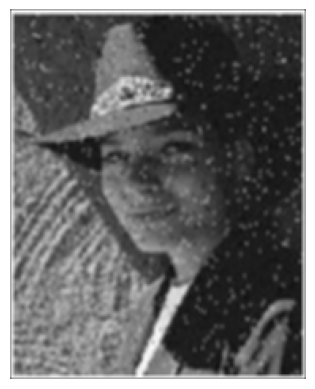

In [3]:
avg_img = avg_filter(img)
plt.imshow(cv2.cvtColor(avg_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

#2.
Опишите, насколько эффективен фильтр среднего для удаления шума типа «соль-перец». Основываясь на вашем понимании медианного фильтра, можете ли вы объяснить, почему фильтр среднего не может удалить шум типа «соль-перец»? Измените программу из задания 1 для медианного фильтра.

In [4]:
def median_filter(image, window = 3):
    pad = window // 2
    h, w, c = image.shape
    image_filtered = np.zeros((h, w, c), dtype = np.uint8)
    image_pad = np.pad(image, ((pad, pad), (pad, pad), (0, 0)), mode = 'constant', constant_values = 0)

    for i in range(h):
        for j in range(w):
            for k in range(c):
                image_filtered[i, j, k] = np.median(image_pad[i:i+window, j:j+window, k]).astype(np.uint8)

    return image_filtered

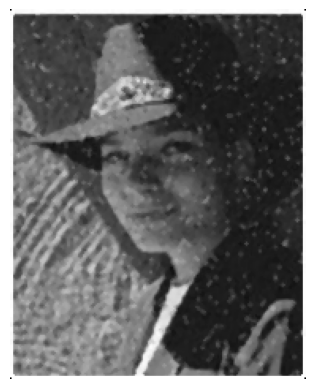

In [5]:
median_img = median_filter(img)
plt.imshow(cv2.cvtColor(median_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

#3.
Напишите программу и проверьте, ли использовать фильтр максимального значения или минимальный фильтр для удаления шума типа «соль-перец»?

In [6]:
def min_filter(image, window = 3):
    pad = window // 2
    h, w, c = image.shape
    image_filtered = np.zeros((h, w, c), dtype = np.uint8)
    image_pad = np.pad(image, ((pad, pad), (pad, pad), (0, 0)), mode = 'constant', constant_values = 0)

    for i in range(h):
        for j in range(w):
            for k in range(c):
                image_filtered[i, j, k] = np.min(image_pad[i:i+window, j:j+window, k]).astype(np.uint8)

    return image_filtered

def max_filter(image, window = 3):
    pad = window // 2
    h, w, c = image.shape
    image_filtered = np.zeros((h, w, c), dtype = np.uint8)
    image_pad = np.pad(image, ((pad, pad), (pad, pad), (0, 0)), mode = 'constant', constant_values = 0)

    for i in range(h):
        for j in range(w):
            for k in range(c):
                image_filtered[i, j, k] = np.max(image_pad[i:i+window, j:j+window, k]).astype(np.uint8)

    return image_filtered

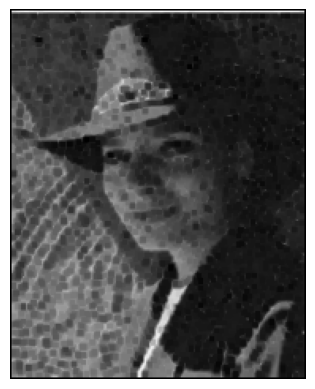

In [7]:
min_img = min_filter(img)
plt.imshow(cv2.cvtColor(min_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

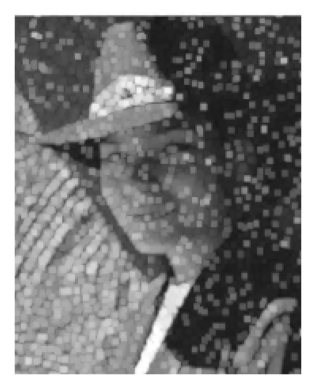

In [8]:
max_img = max_filter(img)
plt.imshow(cv2.cvtColor(max_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

#4.
Напишите программу Python для получения разности лапласиана гауссовой функции (LoG). Возьмите изображение 01.jpg из https://drive.google.com/drive/folders/1syZR4mVjJ9Unypdqx8mIXeHew58k83pA?usp=sharing

    *Псевдокод программы будет следующим:*

* Прочитайте изображение.

* Применить фильтр LoG, предполагая стандартное отклонение 1, и сохранить изображение как im1.

* Применить фильтр LoG, предполагая стандартное отклонение 2, и сохранить изображение как im2.

* Найти разницу между двумя изображениями и сохранить полученное изображение?

In [9]:
from scipy.ndimage import gaussian_laplace

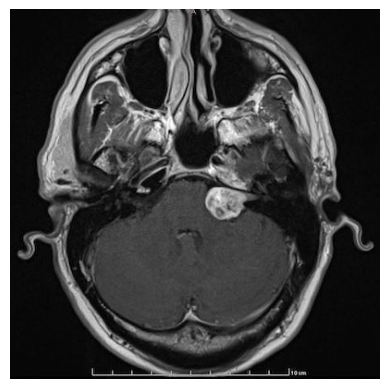

(400, 400, 3)

In [10]:
im0 = cv2.imread('01.jpg')
plt.imshow(cv2.cvtColor(im0, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
im0.shape

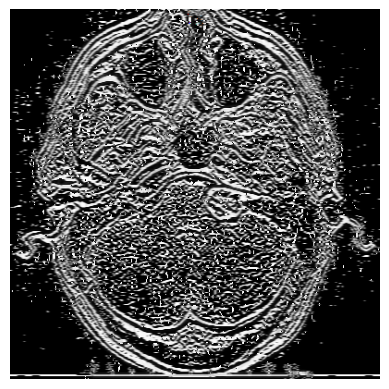

In [11]:
im1 = gaussian_laplace(im0, sigma = 1)
plt.imshow(cv2.cvtColor(im1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

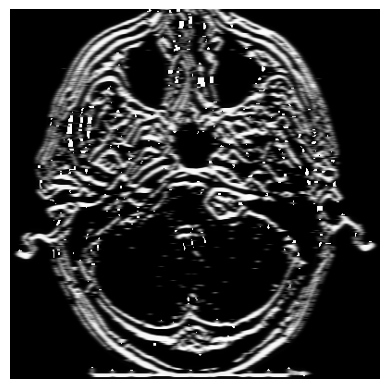

In [12]:
im2 = gaussian_laplace(im0, sigma = 2)
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

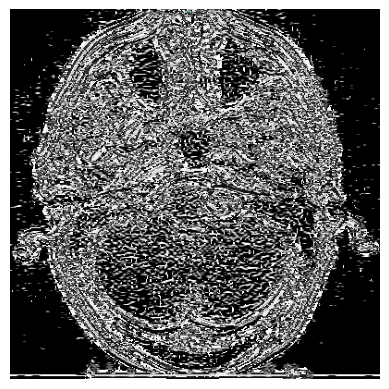

In [13]:
diff = im1 - im2
plt.imshow(cv2.cvtColor(diff, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [14]:
cv2.imwrite('im1.jpg', im1)
cv2.imwrite('im2.jpg', im2)
cv2.imwrite('diff.jpg', diff)

True